In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

In [2]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)

In [4]:
session512

In [29]:
rates = session512.data['rates']
angles = session512.data['angles']
coords = session512.data['coords']

In [19]:
print(len(cords))

4


In [27]:
len(rates[0])

2962

In [28]:
(angles[0].shape)[0]


2962

In [22]:
cords[0].shape


(2962, 17, 3)

In [23]:
session512.data.keys()

dict_keys(['bodyparts', 'angle_names', 'rates', 'coords', 'angles'])

In [24]:
session512.data['bodyparts']

['toe',
 'MTP',
 'ankle',
 'knee',
 'pelvis bottom',
 'hip',
 'pelvis top',
 'finger',
 'knuckle',
 'wrist',
 'elbow',
 'shoulder',
 'scapula',
 'x1',
 'x2',
 'y1',
 'y2']

In [31]:
new_rates = []
new_angles = []
new_coords = []
for i in range(len(rates)):
    size_we_want = int(rates[i].shape[0] / 2)
    temp_rate = rates[i][:size_we_want,:]
    new_rates.append(temp_rate)
    temp_angle = angles[i][:size_we_want,:]
    new_angles.append(temp_angle)
    temp_coord = coords[i][:size_we_want,:, :]
    new_coords.append(temp_coord)

In [32]:
session512.decode_angles?


Signature: session512.decode_angles(X=None, Y=None)
Docstring:
takes list of rates, angles, then using a wiener filter to decode. 
if no parameters are passed, uses data['rates'] and data['angles']
File:      /mnt/c/oobootoo/rat-fes/src/cort_processor.py
Type:      method


In [33]:
h, vaf, x_test, y_test = session512.decode_angles(X=new_rates, Y=new_angles)

In [34]:
h.shape

(321, 7)

In [37]:
vaf.shape

(7, 10)

In [39]:
vaf[0,:]

array([0.24308655, 0.17563321, 0.36653042, 0.22346944, 0.27693421,
       0.22145846, 0.14266346, 0.43770159, 0.40352149, 0.41760491])

In [40]:
np.average(vaf,axis=1)

array([0.29086037, 0.44053968, 0.12470967, 0.4076067 , 0.36558922,
       0.0036785 , 0.29925616])

In [41]:
plot_wiener_filter_predic?

Signature: plot_wiener_filter_predic(test_x, test_y, h)
Docstring: <no docstring>
File:      /mnt/c/oobootoo/rat-fes/src/plotter.py
Type:      function


In [42]:
x_test.shape

(708, 320)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
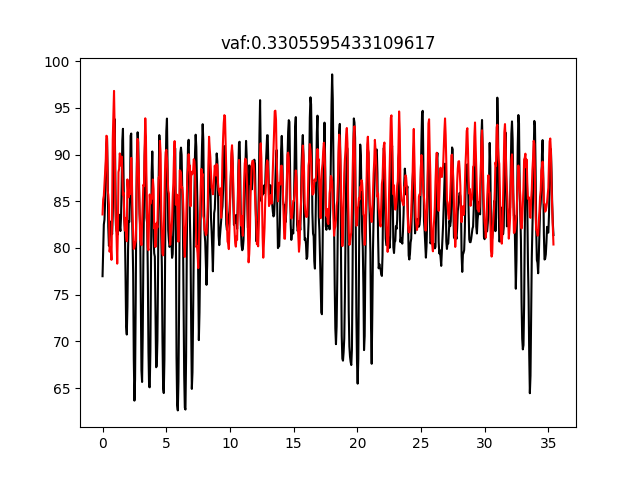

In [46]:
plot_wiener_filter_predic(x_test, y_test[:,2], h[:,2])